# Crypto Currency Portfolio Tracker

In this notebook we'll track our crypto currency portfolio using the coinmarketcap api. 
Coinmarket cap does not give historical data freely so we can only call in latest quotes.

We could consider using Alpha Vantage to see if they allow free historical calls. Otherwise we're stuck with calling in historical data from Trading View.

Tasks
1. Create an api request and call all the latest portfolio prices into a dataframe.
2. Set up a scheduler to automatically call the data in at a set point each day.
3. Create a database that stores the performance of the coin since it was added to portfolio
4. Include features: investment date, where stored, target price, %age gains on various timeframes, total invested, current value of investment. Also include other financial details such as market cap, number of wallets. In a secon d phase for the project we could include more on chain metrics etc.
5. Produce graphical metrics to show performance, split of holdings, latest news etc and host on dash / heroku etc.

In [458]:
# Import required libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fivethirtyeight")

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'

In [3]:
header = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'd4e80b79-6f20-4984-b631-0a4d72b30eb9'
}

## Latest Quotes
Create a for loop that iterates through our portfolio, makes a json request for each and stores the latest quote in a dataframe

In [ ]:



def latest_quotes():

    # Create a list of crypto symbols in my portfolio
    portfolio = ["UNI", "VET", "ETH", "BTC", "DOT", "XRP", "EFX", "GRT", "UOS", "DOGE", "MKR", "LINK"]
    
    # Set an empty list to hold the ticker symbols
    quote_list = []
    
    # Loop thro' the list of symbols and call in the price data for each
    for i in portfolio:


        params = {
            'symbol': i,
        }

        # Call the api
        json = requests.get(url, params=params, headers=header).json()

        # Store the price data in a variabl
        price = json["data"][i]["quote"]["USD"]["price"]
        #print(price)

        # Append price to the quote_list
        quote_list.append(price)
        
    # Now construct a dataframe of ticker symbols and quotes, we'll start by zipping the list into tuples
    data = list(zip(portfolio,quote_list))
    
    # Convert tuples into a df with columns
    quotes = pd.DataFrame(data, columns=["ticker", "quote"])
    
    # Return the dataframe
    
    return quotes
    
    

In [ ]:
latest = latest_quotes()
latest

In [ ]:
# Store the returned info
json = requests.get(url, params=params, headers=header).json()

In [ ]:
json.keys()

In [ ]:
json["status"]

In [ ]:
data = json["data"]
data["VET"]["symbol"]

In [ ]:
price_data = json["data"]["VET"]["quote"]["USD"]["price"]
price_data["price"]

In [ ]:
data

In [ ]:
pd.DataFrame(data)

In [ ]:
import yfinance as yf

In [ ]:
efx = yf.download(tickers='UNI-USD', period='1y', interval="60m")
efx

## COINGECKO API

In [ ]:
#!pip install pycoingecko

In [4]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [5]:
# Get bitcoin spot price and history
btc_quote = cg.get_price(ids='bitcoin', vs_currencies='usd')
btc_history = cg.get_coin_history_by_id(id='bitcoin', vs_currencies='usd', date='30-12-2020')
btc_charts = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=90)

In [6]:
btc_history

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 100735.81648806183,
   'ars': 2304672.6069099954,
   'aud': 36036.36525259337,
   'bch': 77.40245762396826,
   'bdt': 2325253.105347625,
   'bhd': 10340.011044750097,
   'bmd': 27424.538954606684,
   'bnb': 704.5904441589096,
   'brl': 142884.56298285734,
   'btc': 1.0,
   'cad': 35159.63016675354,
   'chf': 

In [7]:
pd.DataFrame(btc_charts).iloc[:, 0]

0       [1610720367182, 37385.821030918145]
1        [1610724577571, 36487.35771056916]
2        [1610726742236, 35313.59615843173]
3        [1610731485047, 35632.54270257075]
4        [1610734942104, 36087.80884507106]
                       ...                 
2159     [1618484630546, 62320.26566265919]
2160     [1618488455444, 62408.36343150974]
2161     [1618492200343, 62680.37525804654]
2162    [1618495264903, 62980.042936166436]
2163    [1618495953000, 62915.329303982944]
Name: prices, Length: 2164, dtype: object

In [38]:
btc_charts

{'prices': [[1610720367182, 37385.821030918145],
  [1610724577571, 36487.35771056916],
  [1610726742236, 35313.59615843173],
  [1610731485047, 35632.54270257075],
  [1610734942104, 36087.80884507106],
  [1610738827326, 35883.13986886532],
  [1610741366473, 35203.13353467157],
  [1610744597858, 35687.68062782053],
  [1610748304977, 36170.88033011955],
  [1610752714821, 36547.34076280214],
  [1610757078810, 37301.856018637016],
  [1610759427146, 37192.86397979419],
  [1610763294526, 37160.039698013425],
  [1610767709211, 36443.44169588673],
  [1610770523266, 36602.12156068429],
  [1610774984933, 36187.55792144535],
  [1610778248260, 36135.69792211756],
  [1610781981893, 36862.69895237206],
  [1610785421504, 36791.709742333325],
  [1610788966461, 37279.37102148075],
  [1610792953705, 37707.72054177663],
  [1610796583924, 37192.36321045197],
  [1610800089200, 37262.3577325775],
  [1610802698068, 37575.1111644502],
  [1610806524330, 37159.175094296595],
  [1610810480986, 37216.958968603314]

In [8]:
btc_data = pd.DataFrame(btc_charts)

In [9]:
btc_data

,prices,market_caps,total_volumes
0,"[1610720367182, 37385.821030918145]","[1610720367182, 698063757265.6418]","[1610720367182, 57192763568.16411]"
1,"[1610724577571, 36487.35771056916]","[1610724577571, 678709536332.4785]","[1610724577571, 56555166206.45839]"
2,"[1610726742236, 35313.59615843173]","[1610726742236, 659562844132.6566]","[1610726742236, 53855052525.07498]"
3,"[1610731485047, 35632.54270257075]","[1610731485047, 662809371723.139]","[1610731485047, 56297838856.070946]"
4,"[1610734942104, 36087.80884507106]","[1610734942104, 671279256474.5991]","[1610734942104, 58243228565.313576]"
...,...,...,...
2159,"[1618484630546, 62320.26566265919]","[1618484630546, 1166978393701.2297]","[1618484630546, 70871274805.56682]"
2160,"[1618488455444, 62408.36343150974]","[1618488455444, 1165857084945.4692]","[1618488455444, 69894831035.18227]"
2161,"[1618492200343, 62680.37525804654]","[1618492200343, 1170827327954.1213]","[1618492200343, 69181495993.41121]"
2162,"[1618495264903, 62980.042936166436]","[1618495264903, 1177509496817.462]","[1618495264903, 68959339553.55032]"


In [10]:
prices = btc_charts["prices"]
mkt_caps = btc_charts["market_caps"]
ttl_vols = btc_charts["total_volumes"]

In [11]:
times = [item[0] for item in prices]
price = [item[1] for item in prices]
mkt_cap = [item[1] for item in mkt_caps]
vol = [item[1] for item in ttl_vols]

In [12]:
len(times)

2164

In [13]:
len(mkt_cap)

2164

In [14]:
btc = pd.DataFrame(columns=btc_data.columns)

In [15]:
btc["prices"] = price
btc["market_caps"] = mkt_cap
btc["total_volumes"] = vol
btc["times"] = times

In [16]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         2164 non-null   float64
 1   market_caps    2164 non-null   float64
 2   total_volumes  2164 non-null   float64
 3   times          2164 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 67.8 KB


In [17]:
btc

,prices,market_caps,total_volumes,times
0,37385.821031,6.980638e+11,5.719276e+10,1610720367182
1,36487.357711,6.787095e+11,5.655517e+10,1610724577571
2,35313.596158,6.595628e+11,5.385505e+10,1610726742236
3,35632.542703,6.628094e+11,5.629784e+10,1610731485047
4,36087.808845,6.712793e+11,5.824323e+10,1610734942104
...,...,...,...,...
2159,62320.265663,1.166978e+12,7.087127e+10,1618484630546
2160,62408.363432,1.165857e+12,6.989483e+10,1618488455444
2161,62680.375258,1.170827e+12,6.918150e+10,1618492200343
2162,62980.042936,1.177509e+12,6.895934e+10,1618495264903


In [18]:
btc.times = pd.to_datetime(btc.times, unit="ms")
btc.set_index("times")

,prices,market_caps,total_volumes
times,,,
2021-01-15 14:19:27.182,37385.821031,6.980638e+11,5.719276e+10
2021-01-15 15:29:37.571,36487.357711,6.787095e+11,5.655517e+10
2021-01-15 16:05:42.236,35313.596158,6.595628e+11,5.385505e+10
2021-01-15 17:24:45.047,35632.542703,6.628094e+11,5.629784e+10
2021-01-15 18:22:22.104,36087.808845,6.712793e+11,5.824323e+10
...,...,...,...
2021-04-15 11:03:50.546,62320.265663,1.166978e+12,7.087127e+10
2021-04-15 12:07:35.444,62408.363432,1.165857e+12,6.989483e+10
2021-04-15 13:10:00.343,62680.375258,1.170827e+12,6.918150e+10


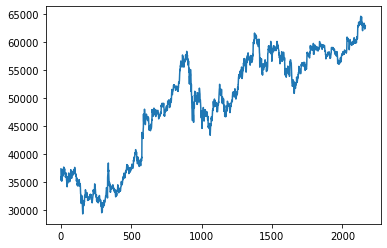

In [19]:
plt.plot(btc["prices"]);

In [264]:
# Get Vechain history
# Get bitcoin spot price and history
vechain_quote = cg.get_price(ids='the-graph', vs_currencies='usd')
vechain_history = cg.get_coin_history_by_id(id='the-graph', vs_currencies='usd', date='30-12-2020')
vechain_charts = cg.get_coin_market_chart_by_id(id='the-graph', vs_currency='usd', days=90)

In [266]:
vechain_quote

{'the-graph': {'usd': 1.73}}

In [267]:
vechain_charts

{'prices': [[1610986721323, 0.6310248701910302],
  [1610990573536, 0.6128597986741491],
  [1610993028973, 0.6104722138195765],
  [1610997388424, 0.6213013548196923],
  [1611001297728, 0.5944996565489417],
  [1611004738665, 0.6087914862826646],
  [1611008335239, 0.638911067729777],
  [1611011321033, 0.6235384541172895],
  [1611015415739, 0.6215965094929722],
  [1611018550624, 0.6418940564994653],
  [1611021720246, 0.6045111221560295],
  [1611025321058, 0.5714377406903131],
  [1611029351372, 0.57360638788617],
  [1611032930299, 0.5599501070489981],
  [1611036524678, 0.5315145296932482],
  [1611040111255, 0.5386275957120927],
  [1611043705092, 0.5514244540682909],
  [1611047797187, 0.5455218649499455],
  [1611050885325, 0.538265623304178],
  [1611054504901, 0.5342760258528527],
  [1611058328925, 0.551834195977998],
  [1611061679978, 0.5489122774763182],
  [1611065084040, 0.5459851023030106],
  [1611068719412, 0.5826357215497824],
  [1611072489240, 0.5879539784624737],
  [1611076323509, 0.

In [23]:
portfolio_list = ["bitcoin", "vechain", "ethereum", "maker", "chainlink", "ultra", "effect-ai",
                  "uniswap", 'polkadot', "ripple", "dogecoin", "the-graph"
                 ]

In [24]:
quote = cg.get_price(ids='the-graph', vs_currencies='usd')
history = cg.get_coin_history_by_id(id='the-graph', vs_currencies='usd', date='30-12-2020')
charts = cg.get_coin_market_chart_by_id(id='the-graph', vs_currency='usd', days=90)

In [25]:
#history["symbol"]
quote["the-graph"]["usd"]

2.09

### NARRATIVE
Ok so we have our portfolio list, with ids confirmed by the coingecko coin list endpoint. Now we want to store each coin data in a .csv. To start with we'll just store the chart data for each coin in a standalone dataset.

How about a dictionary. let's start by storing the name, ticker and quote of two tokens in a dictionary

In [33]:
# Import time as we found that adding a delay to the api call helps smooth the process
import time
# Set an empty portfolio dictionary that will hold our users portfolio information
portfolio_dict = {}

# Set a list holding all the user's tokens
port_list = ["bitcoin", "vechain", "ethereum", "maker", "chainlink", "ultra", "effect-ai",
                  "uniswap", 'polkadot', "ripple", "dogecoin", "the-graph"
                 ]




for i in range(len(port_list)):
    
    # Create a master key, which will be equal to the name of the token
    master_key = port_list[i]
    
    # Set our sub keys which is the description of every piece of info we'll hold on a token
    sub_keys = ["ticker", "quote"]
    
    # Set an empty values list that will hold the called in information
    values = []
    
    
    
    # Call in the history, access the ticker and append to the values list
    history = cg.get_coin_history_by_id(id=port_list[i], vs_currencies='usd', date='30-12-2020')
    ticker = history["symbol"]
    values.append(ticker)
    
    # Call in the quote and append to the values
    quote = cg.get_price(ids=port_list[i], vs_currencies='usd')[port_list[i]]["usd"]
    values.append(quote)
    
    # Create a token dictionary on every iteration
    token_dict = {master_key : {sub_keys[0]: values[0], sub_keys[1]: values[1]}}

    # Add the token dictionary to the master portfolio dictionary
    portfolio_dict.update(token_dict)
    
    # Print to see progress through api calls - seems slow
    print(token_dict)
    
    # Wait a few seconds between each iteration, help the api as url timing out and api sluggish
    time.sleep(15)
    

{'bitcoin': {'ticker': 'btc', 'quote': 62737}}
{'vechain': {'ticker': 'vet', 'quote': 0.187957}}
{'ethereum': {'ticker': 'eth', 'quote': 2471.12}}
{'maker': {'ticker': 'mkr', 'quote': 3282.71}}
{'chainlink': {'ticker': 'link', 'quote': 43.59}}
{'ultra': {'ticker': 'uos', 'quote': 0.532157}}
{'effect-ai': {'ticker': 'efx', 'quote': 0.089381}}
{'uniswap': {'ticker': 'uni', 'quote': 38.89}}
{'polkadot': {'ticker': 'dot', 'quote': 43.23}}
{'ripple': {'ticker': 'xrp', 'quote': 1.71}}
{'dogecoin': {'ticker': 'doge', 'quote': 0.132365}}
{'the-graph': {'ticker': 'grt', 'quote': 2.12}}


In [37]:
portfolio_dict["dogecoin"]["ticker"]

'doge'

#### NEXT STEP
Ok now we want to add in the charts as the final element in each dictionary, We'll trial with bitcoin and ethereum to see if we can create a dictionary that holds all the information:


In [77]:
# Set a list holding all the user's tokens
port_list = ["bitcoin", "vechain", "ethereum", "maker", "chainlink", "ultra", "effect-ai",
                  "uniswap", 'polkadot', "ripple", "dogecoin", "the-graph"
                 ]
port_dict = {}

for i in range(len(port_list)):
    
    # Create a master key, which will be equal to the name of the token
    master_key = port_list[i]
    
    # Set our sub keys which is the description of every piece of info we'll hold on a token
    sub_keys = ["ticker", "quote", "price_history"]
    
    # Set an empty values list that will hold the called in information
    values = []
    
    
    
    # Call in the history, access the ticker and append to the values list
    history = cg.get_coin_history_by_id(id=port_list[i], vs_currencies='usd', date='30-12-2020')
    ticker = history["symbol"]
    values.append(ticker)
    
    # Call in the quote and append to the values
    quote = cg.get_price(ids=port_list[i], vs_currencies='usd')[port_list[i]]["usd"]
    values.append(quote)
    
    # Call in the chart 
    chart = cg.get_coin_market_chart_by_id(id=port_list[i], vs_currency='usd', days=90)
    
    # Create a token dictionary on every iteration, store our key value pairs including prices
    token_dict = {master_key : {sub_keys[0]: values[0], sub_keys[1]: values[1], sub_keys[2]: chart}}

    # Add the token dictionary to the master portfolio dictionary
    port_dict.update(token_dict)
    
    # Print to see progress through api calls - seems slow
    print(i)
    
    # Wait a few seconds between each iteration, help the api as url timing out and api sluggish
    time.sleep(30)
    




0
1
2
3
4
5
6
7
8
9
10
11


In [78]:
# Check the keys look ok??
port_dict.keys() ## All good!

dict_keys(['bitcoin', 'vechain', 'ethereum', 'maker', 'chainlink', 'ultra', 'effect-ai', 'uniswap', 'polkadot', 'ripple', 'dogecoin', 'the-graph'])

In [53]:
data = port_dict["bitcoin"]["price_history"]
data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [57]:
# Extract metrics from the data
price = data["prices"]
mkt_cap = data["market_caps"]
volume = data["total_volumes"]

# Save the individual metrics to variables
times = [item[0] for item in price]
prices = [item[1] for item in price]
mkt_caps = [item[1] for item in mkt_cap]
vols = [item[1] for item in volume]

In [157]:
# Create the dataframe and populate the features
bitcoin = pd.DataFrame(columns=["time", "price", "market_cap", "volume"])
bitcoin.time = times
bitcoin.price = prices
bitcoin.market_cap = mkt_caps
bitcoin.volume = vols

# Change the time format to datetime and set it as the index
bitcoin.time = pd.to_datetime(bitcoin.time, unit="ms")
bitcoin.set_index("time", inplace=True)

In [158]:
bitcoin

,price,market_cap,volume
time,,,
2021-01-15 15:29:37.571,36487.357711,6.787095e+11,5.655517e+10
2021-01-15 16:05:42.236,35313.596158,6.595628e+11,5.385505e+10
2021-01-15 17:24:45.047,35632.542703,6.628094e+11,5.629784e+10
2021-01-15 18:22:22.104,36087.808845,6.712793e+11,5.824323e+10
2021-01-15 19:27:07.326,35883.139869,6.633374e+11,6.216995e+10
...,...,...,...
2021-04-15 12:07:35.444,62408.363432,1.165857e+12,6.989483e+10
2021-04-15 13:10:00.343,62680.375258,1.170827e+12,6.918150e+10
2021-04-15 14:01:04.903,62980.042936,1.177509e+12,6.895934e+10


In [67]:
bitcoin.describe()

,price,market_cap,volume
count,2164.000000,2.164000e+03,2.164000e+03
mean,48996.214329,9.135489e+11,5.981724e+10
std,9624.339259,1.804207e+11,1.247292e+10
min,29355.546377,5.462142e+11,3.940492e+10
25%,38892.282804,7.237933e+11,5.146968e+10
50%,50845.002460,9.481051e+11,5.781735e+10
75%,57414.867470,1.071093e+12,6.410136e+10
max,64594.993899,1.210375e+12,1.246570e+11


(array([737805., 737822., 737836., 737850., 737864., 737881., 737895.]),
 <a list of 7 Text major ticklabel objects>)

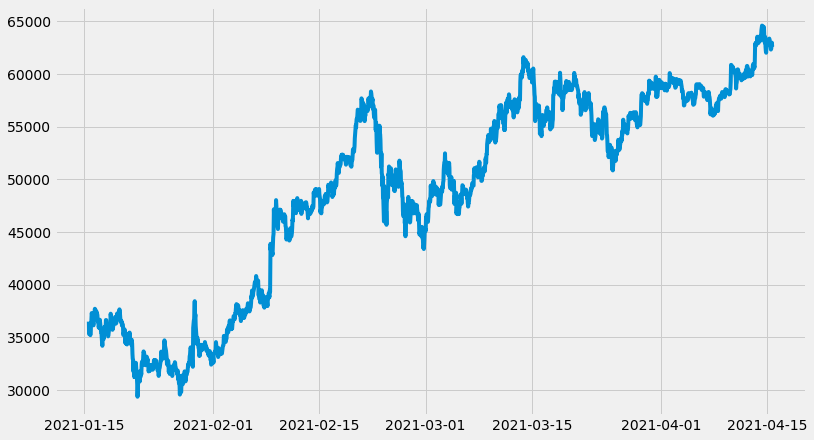

In [74]:
plt.figure(figsize=(12,7))
plt.plot(bitcoin.price);

plt.xticks()

## Next Step

Create a user interface that asks the following:
1. Save the user posrtfolio as a json to avoid lengthy future api calls
1. What are your portfolio tokens >>> call in and store the portfolio, give options to view dashboard
2. What token do you want to review >>> display the specific token details, performance etc as per roadmap\
3. We need to ask the user what date or price they bought at and how much they bough on the given date

## Save the user portfolio

In [84]:
# We should save this dictionary as a json for now so that we don't have to repeat the lengthy call process
import json

json = json.dumps(port_dict)
f = open("my_portfolio.json", "w")
f.write(json)
f.close()

In [99]:
# Let's check we can read back in ok
my_port = pd.read_json("my_portfolio.json").to_dict()

In [100]:
# And check the keys again
my_port.keys()

dict_keys(['bitcoin', 'vechain', 'ethereum', 'maker', 'chainlink', 'ultra', 'effect-ai', 'uniswap', 'polkadot', 'ripple', 'dogecoin', 'the-graph'])

## User input  - price  - Set up phase
1. Ask the user the date of purchase and how many of each they bought
3. Store this as the cost value for each token
4. If they bought on more than one occassion, get an average purchase price to calculate cost
5. Ask the user if they made any subsequent crypto swaps
6. Ask the user what their current portfolio is

After the set up phase the latest portfolio can just be tracked by calling in the latest quotes on a 12hourly basis. So we'll automate the api calls for 12am and 12 midnight. We store the quote and add it as the latest price and save it in the master portfolio dictionary.

Everytime a user logs in we as if their portfolio has changed since the last login. If so thaen we ask whether a new initial fiat purchase / sale has been made or whether a swap has taken place. We update the portfolio dictionary to reflect the changes. 

In [172]:
qty = float(input("How many did you buy: "))

How many did you buy: 0.0703


In [148]:
date = input("What date did you buy? (yyyy-mm-dd) ")

What date did you buy? (yyyy-mm-dd) 2021-02-12


In [149]:
date

'2021-02-12'

In [300]:
bitcoin["date"] = pd.to_datetime(bitcoin.index)
bitcoin["date"] = pd.to_datetime(bitcoin.date).dt.date
bitcoin.date = pd.to_datetime(bitcoin.date)

In [301]:
bitcoin.head(3)

,price,market_cap,volume,date
time,,,,
2021-01-15 15:29:37.571,36487.357711,6.787095e+11,5.655517e+10,2021-01-15
2021-01-15 16:05:42.236,35313.596158,6.595628e+11,5.385505e+10,2021-01-15
2021-01-15 17:24:45.047,35632.542703,6.628094e+11,5.629784e+10,2021-01-15


In [170]:
ave_price = round(bitcoin[bitcoin.date == date].price.mean(),2)
#bitcoin.info()

In [171]:
ave_price

47467.22

In [173]:
cost = qty * ave_price
cost

3336.9455660000003

In [195]:
new_list = ["jon", "jon", "jim", "jon", "kate", "kate"]
list_set = list(set(new_list))
list_set


['jim', 'kate', 'jon']

In [277]:
def api_call(port_list):
    
    # we only want the set of tokens in the port_list
    port_set = list(set(port_list))
    
    port_dict = {}

    for i in range(len(port_set)):

        # Create a master key, which will be equal to the name of the token
        master_key = port_set[i]

        # Set our sub keys which is the description of every piece of info we'll hold on a token
        sub_keys = ["ticker", "quote", "price_history"]

        # Set an empty values list that will hold the called in information
        values = []



        # Call in the history, access the ticker and append to the values list
        history = cg.get_coin_history_by_id(id=port_set[i], vs_currencies='usd', date='30-12-2020')
        ticker = history["symbol"]
        values.append(ticker)

        # Call in the quote and append to the values
        quote = cg.get_price(ids=port_set[i], vs_currencies='usd')[port_set[i]]["usd"]
        values.append(quote)

        # Call in the chart 
        chart = cg.get_coin_market_chart_by_id(id=port_set[i], vs_currency='usd', days=90)

        # Create a token dictionary on every iteration, store our key value pairs including prices
        token_dict = {master_key : {sub_keys[0]: values[0], sub_keys[1]: values[1], sub_keys[2]: chart}}

        # Add the token dictionary to the master portfolio dictionary
        port_dict.update(token_dict)

        # Print to see progress through api calls - seems slow
        print(i)

        # Wait a few seconds between each iteration, help the api as url timing out and api sluggish
        time.sleep(30)
    
    return port_dict



In [278]:
ids

['01coin',
 '0-5x-long-algorand-token',
 '0-5x-long-altcoin-index-token',
 '0-5x-long-balancer-token',
 '0-5x-long-bitcoin-cash-token',
 '0-5x-long-bitcoin-sv-token',
 '0-5x-long-bitcoin-token',
 '0-5x-long-cardano-token',
 '0-5x-long-chainlink-token',
 '0-5x-long-cosmos-token',
 '0-5x-long-defi-index-token',
 '0-5x-long-dogecoin-token',
 '0-5x-long-dragon-index-token',
 '0-5x-long-echange-token-index-token',
 '0-5x-long-eos-token',
 '0-5x-long-ethereum-classic-token',
 '0-5x-long-ethereum-token',
 '0-5x-long-kyber-network-token',
 '0-5x-long-matic-token',
 '0-5x-long-midcap-index-token',
 '0-5x-long-okb-token',
 '0-5x-long-pax-gold-token',
 '0-5x-long-privacy-index-token',
 '0-5x-long-shitcoin-index-token',
 '0-5x-long-swipe-token',
 '0-5x-long-tether-gold-token',
 '0-5x-long-tezos-token',
 '0-5x-long-theta-network-token',
 '0-5x-long-xrp-token',
 '0cash',
 '0chain',
 '0x',
 '0xcert',
 '0xmonero',
 '10x-gg',
 '12ships',
 '1337',
 '1ai',
 '1inch',
 '1irstgold',
 '1million-token',
 '1wo

In [293]:
def user_setup():
    
    """
    In this function we will set up the initial user portfolio, we'll ask the following questions and store their coin
    portfolio which will include the coin name, historical price data, ticker and portfolio history
    """
    
    
    port_list = []
    purchase_dates = []
    cost_list = []
    qty_list = []
    more_coins = "yes"
    
    ### 1. Ask the user which coins they have in their portfolio and add to a portfolio list
    
    ### 2. Ask the user the date of purchase and add to variable
    
    ### 3. Ask the user how many of the token was procured and add metric to variable
    
    ### 4. Ask the user if they have any more coins to add to the portfolio
    
    ### 5. If they have then go back to question 1, if not then continue
    
    ### 6. Use Coingecko api to call in the coin ticker, historical price data (from date of purchase to now)
    
    ### 7. Store all the information in a dictionary and save the dictionary as json - this is the base portfolio
    
    for i in range(100): # Let's assume no-one with more than 100 coins in their portfolio
        
        # Assume how user wants to add coins to his portfolio at this setup stage
        if more_coins == "yes":

            # Ask the user for the name of a coin they wish to add to their portfolio
            coin_name = input("Type in the name of a coin in your portfolio: ") # eth, vet, btc etc etc
            
            # Check user has entered a valid coin id, if not, ask the user to retry

            while coin_name:
                if coin_name in ids:
                    print(coin_name)
                    break
                else:
                    coin_name = input("That coin has not been found, please try again. Refer to catalogue for \
                    full list of cryto ids")
            
            # Ask the user the date on which the coin was purchased
            date = input("What was the purchase date:(yyyy-mm-dd) ") # 2020-10-23
            
            # Check the user has entered a valid date, otherwise ask for a re-entry
            date_format = "%Y-%m-%d"
            while date:
                try:
                    datetime.datetime.strptime(date, date_format)
                    print("This is the correct date format")
                    break
                except ValueError:
                    print("Please enter a valid date in yyyy-mm-dd format")
                    date= input("date")

            
            
            
            cost = float(input("What was the purchase cost:(USD) ")) # 250
            quantity = float(input("How many of this coin did you buy: ")) # 1500.0 will be stored as a float
            
        


            # Append the details to the relevant lists, note we should append None where no answer given
            port_list.append(coin_name)
            purchase_dates.append(date)
            cost_list.append(cost)
            qty_list.append(quantity)
                
        
        # If the user has added 
#         elif more_coins == "no":
#             break
            
        # Ask the user if they have anymore coins to add to the portfolio
            
        more = input("Do you have anymore coins to add to your portfolio? y/n ")
        
        while more:
            if more.lower() == 'y' or more.lower() == "yes":
                break
            elif more.lower() =='n' or more.lower() == "no":
                break
            else:
                more = input("Please enter 'y' or 'n' to continue")
        
        if more.lower() == "y" or more.lower() == "yes":
            continue
        else:
            break
    print(port_list)
    ## Call the api based on the port list
    portfolio = api_call(port_list) # Bear in mind the api will want only unique values from our port_list
    
    # Create a purchase history from our lists at top of page
    transaction_history = pd.DataFrame()
    
    transaction_history["name"] = port_list
    transaction_history["date"] = purchase_dates
    transaction_history["cost"] = cost_list
    transaction_history["quantity"] = qty_list
    
    
    
    
    return portfolio, transaction_history
        
        

In [294]:
port, trans = user_setup()

Type in the name of a coin in your portfolio: dogecoin
dogecoin
What was the purchase date:(yyyy-mm-dd) 2020-10-03
This is the correct date format
What was the purchase cost:(USD) 500
How many of this coin did you buy: 3000
Do you have anymore coins to add to your portfolio? y/n y
Type in the name of a coin in your portfolio: bitcoin
bitcoin
What was the purchase date:(yyyy-mm-dd) 2020-10-30
This is the correct date format
What was the purchase cost:(USD) 5000
How many of this coin did you buy: 0.3
Do you have anymore coins to add to your portfolio? y/n y
Type in the name of a coin in your portfolio: the-graph
the-graph
What was the purchase date:(yyyy-mm-dd) 2021-03-23
This is the correct date format
What was the purchase cost:(USD) 500
How many of this coin did you buy: 234
Do you have anymore coins to add to your portfolio? y/n n
['dogecoin', 'bitcoin', 'the-graph']
0
1
2


In [295]:
port.keys()

dict_keys(['dogecoin', 'bitcoin', 'the-graph'])

In [298]:
port["dogecoin"]["quote"]

0.306462

In [296]:
trans

,name,date,cost,quantity
0,dogecoin,2020-10-03,500.0,3000.0
1,bitcoin,2020-10-30,5000.0,0.3
2,the-graph,2021-03-23,500.0,234.0


OK great, we've made a basic user interface that returns some key information of the crypotcurrencies they hold and also creates a dataframe to store their transaction history. Note that the transaction history may need to be split into two sections, fiat investments and crypto swaps.

#### Transaction History Requirements
1. Initial FIAT investments
2. Crypto to Crypto Swaps

In [439]:
def performance(data):
    
    """
    This function calculates the performance of the requested crytpo currency
    """
    
    # First get todays date and the current month
    now_date = datetime.date.today().strftime("%Y-%m-%d")
    now_month=now_date[5:7] # split out the month from the date

    # Query the latest monthly data
    monthly_data = data[data["date"].between("2021-"+now_month+"-01", now_date)]
    
    # Now calculate the percentage change for the month
    open_monthly = monthly_data.price[0]
    close_monthly = monthly_data.price[-1]
    
    percent_chg = 0
    if open_monthly > close_monthly:
        percent_chg = -round(100 - ((100/open_monthly) * close_monthly), 2)
    elif open_monthly < close_monthly:
        percent_chg = round((100/open_monthly) * close_monthly, 2)
    else: 
        percent_chg = 0
        
    return percent_chg, monthly_data

In [440]:
def portfolio_analysis(portfolio, user_request):
    
    """
    Here we'll return a number of metrics and visualisations to show the performance of the asset or assets requested
    by the user in the terminal
    """
    
    
    
    ## We'll start basic - what percent is the investment up for the month 
    
    data = portfolio[user_request]["price_history"]
    #data.keys()
    
    # Extract metrics from the data
    price = data["prices"]
    mkt_cap = data["market_caps"]
    volume = data["total_volumes"]

    # Save the individual metrics to variables
    times = [item[0] for item in price]
    prices = [item[1] for item in price]
    mkt_caps = [item[1] for item in mkt_cap]
    vols = [item[1] for item in volume]
    
    # Create the dataframe and populate the features
    coin_df = pd.DataFrame(columns=["time", "price", "market_cap", "volume"])
    coin_df.time = times
    coin_df.price = prices
    coin_df.market_cap = mkt_caps
    coin_df.volume = vols

    # Change the time format to datetime and set it as the index
    coin_df.time = pd.to_datetime(coin_df.time, unit="ms")
    coin_df.set_index("time", inplace=True)
    
    # Create a date feature that holds only the date
    coin_df["date"] = pd.to_datetime(coin_df.index)
    coin_df["date"] = pd.to_datetime(coin_df.date).dt.date
    coin_df.date = pd.to_datetime(coin_df.date)
    
    # We've created the dataframe for the specific coin - now we want to know the %age change for the month
    
    # percent_chg = performance(coin_df)

    

    
    return coin_df, user_request
    
    
    

In [426]:
df, coin = portfolio_analysis(port, "dogecoin")

In [427]:
print(coin)
df

dogecoin


,price,market_cap,volume,date
time,,,,
2021-01-18 17:25:13.662,0.009107,1.165654e+09,3.083568e+08,2021-01-18
2021-01-18 18:11:10.519,0.009090,1.165150e+09,3.052820e+08,2021-01-18
2021-01-18 19:07:27.905,0.009132,1.168337e+09,3.064903e+08,2021-01-18
2021-01-18 20:02:30.461,0.009190,1.176309e+09,3.100439e+08,2021-01-18
2021-01-18 21:00:52.264,0.009162,1.172658e+09,3.073525e+08,2021-01-18
...,...,...,...,...
2021-04-18 13:07:49.836,0.301341,3.918886e+10,2.578128e+10,2021-04-18
2021-04-18 14:02:14.387,0.304140,3.934745e+10,2.459234e+10,2021-04-18
2021-04-18 15:20:04.720,0.316796,4.068132e+10,2.427638e+10,2021-04-18


In [413]:
print(f'{coin} has had a {performance}% change this month!')

dogecoin has had a 562.63% change this month!


In [478]:
def terminal():
    
    """
    In this function we will use the data previously stored thro' the user setup and ask the user what they would 
    like to look at
    1. Overall portfolio performance - call to another function 
    2. A specific coin performance - call to another function
    """
    
    analysis = input("What would you like to look at? Enter a coin ticker such as 'eth' or type 'overall' ")
    
    ## This should be a drop down menu
    timeframe = input("What timeframe would you like to review performance over? Enter monthly, ytd or investment")
    
    
    # We pass the portfolio created in user setup and then the name of the coin the user has asked to look at
    #### OVERALL to be added - Only works for individual coins ####
    df, coin = portfolio_analysis(port, analysis)
    
    percent_change, monthly_data = performance(df)
    
    print(f'{coin} has had a {percent_change}% change this month!')
    
    
    # Plot out the requested coin price and time period
    # plot the growth in the given time period
    fig, ax = plt.subplots(figsize=(12,7))
    #plt.figure(figsize=(12,7))
    ax.plot(monthly_data.price, label=coin.capitalize()+" price")
    ax.set_title(coin.capitalize()+" price for current month")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price(USD)")
    #plt.xticks(rotation=45)
    fig.autofmt_xdate()
    plt.legend();

    return df, coin, percent_change, monthly_data
    
    
        

What would you like to look at? Enter a coin ticker such as 'eth' or type 'overall' the-graph
What timeframe would you like to review performance over? Enter monthly, ytd or investmentytd
the-graph has had a -0.15% change this month!


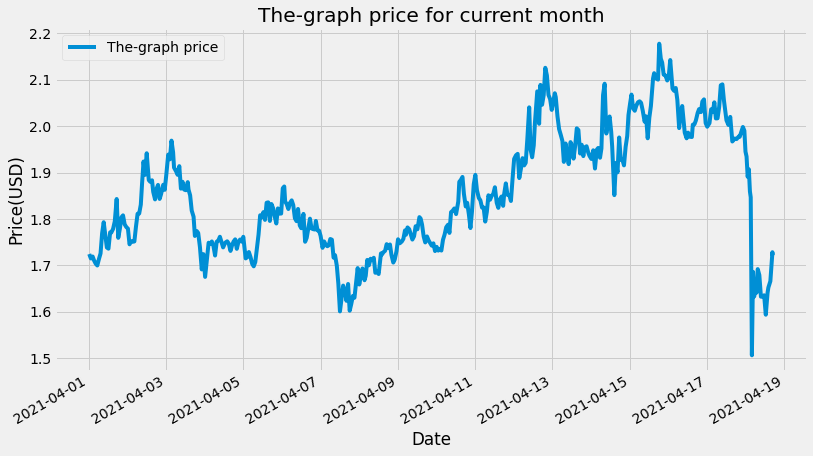

In [479]:
df, coin, growth, period_data = terminal()

In [443]:
period_data

,price,market_cap,volume,date
time,,,,
2021-04-01 00:07:25.796,58772.181282,1.098127e+12,5.628405e+10,2021-04-01
2021-04-01 01:01:23.818,59143.222576,1.104215e+12,5.721721e+10,2021-04-01
2021-04-01 02:19:11.992,59205.020162,1.107146e+12,5.832261e+10,2021-04-01
2021-04-01 03:10:54.378,59059.296123,1.102653e+12,5.955554e+10,2021-04-01
2021-04-01 04:08:18.917,59053.454753,1.101785e+12,6.171534e+10,2021-04-01
...,...,...,...,...
2021-04-18 13:08:19.042,55002.864973,1.033718e+12,9.496688e+10,2021-04-18
2021-04-18 14:02:20.251,55208.709817,1.032541e+12,9.571389e+10,2021-04-18
2021-04-18 15:22:21.817,55464.778520,1.032660e+12,9.669385e+10,2021-04-18


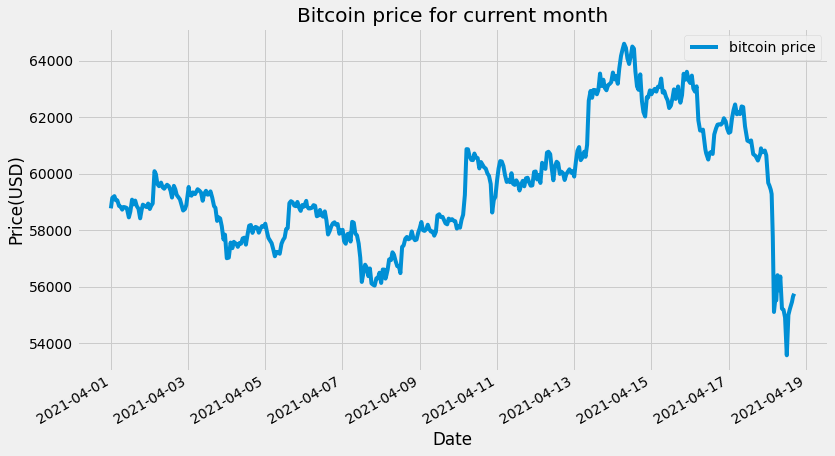

In [467]:
# plot the growth in the given time period
fig, ax = plt.subplots(figsize=(12,7))
#plt.figure(figsize=(12,7))
ax.plot(period_data.price, label=coin+" price")
ax.set_title("Bitcoin price for current month")
ax.set_xlabel("Date")
ax.set_ylabel("Price(USD)")
#plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.legend();

## Other Endpoints

In [204]:
### COINS LIST
coins_list = cg.get_coins_list()

In [214]:
coins_list[0]["name"]

'01coin'

In [215]:
ids = [item["id"] for item in coins_list]

In [219]:
# Query the id list - we can do the same with symbols etc
for i in ids:
    if i[0:3] == "thu":
        print(i)

thugs-finance
thunder-swap
thunder-token


In [220]:
ids

['01coin',
 '0-5x-long-algorand-token',
 '0-5x-long-altcoin-index-token',
 '0-5x-long-balancer-token',
 '0-5x-long-bitcoin-cash-token',
 '0-5x-long-bitcoin-sv-token',
 '0-5x-long-bitcoin-token',
 '0-5x-long-cardano-token',
 '0-5x-long-chainlink-token',
 '0-5x-long-cosmos-token',
 '0-5x-long-defi-index-token',
 '0-5x-long-dogecoin-token',
 '0-5x-long-dragon-index-token',
 '0-5x-long-echange-token-index-token',
 '0-5x-long-eos-token',
 '0-5x-long-ethereum-classic-token',
 '0-5x-long-ethereum-token',
 '0-5x-long-kyber-network-token',
 '0-5x-long-matic-token',
 '0-5x-long-midcap-index-token',
 '0-5x-long-okb-token',
 '0-5x-long-pax-gold-token',
 '0-5x-long-privacy-index-token',
 '0-5x-long-shitcoin-index-token',
 '0-5x-long-swipe-token',
 '0-5x-long-tether-gold-token',
 '0-5x-long-tezos-token',
 '0-5x-long-theta-network-token',
 '0-5x-long-xrp-token',
 '0cash',
 '0chain',
 '0x',
 '0xcert',
 '0xmonero',
 '10x-gg',
 '12ships',
 '1337',
 '1ai',
 '1inch',
 '1irstgold',
 '1million-token',
 '1wo

## User input methods

In [241]:
# Ask the user to enter a coin id
coin_id = input("Please enter your coin")
#date = input("date: ")

# If the coin id is in the full id list then print the coin_id

while coin_id:
    if coin_id in ids:
        print(coin_id)
        break
    else:
        coin_id = input("That coin has not been found, please try again")

        
        
        
date = input("date")
date_format = "%Y-%m-%d"
while date:
    try:
        datetime.datetime.strptime(date, date_format)
        print("This is the correct date format")
        break
    except ValueError:
        print("This is wrong format")
        date= input("date")

Please enter your coinbitoci
That coin has not been found, please try againethereum
ethereum
date2019-09-30
This is the correct date format


In [242]:
print(coin_id, date)

ethereum 2019-09-30


In [233]:
import datetime
date = input("date")
date_format = "%Y-%m-%d"
while date:
    try:
        datetime.datetime.strptime(date, date_format)
        print("This is the correct date format")
        break
    except ValueError:
        print("This is wrong format")
        date= input("date")
    

date2020-23-23
This is wrong format
date2020-13-09
This is wrong format
date2020-09-02
This is the correct date format


In [234]:
date

'2020-09-02'

## Code Roadmap for user interface

1. Ask user which cryptos they have in their portfolio - done
2. Store each of these in a portfolio_list - done
3. Ask user what date or at what price they bought each crypto - done
4. Store both in separate lists - done
5. Call in the quotes, history and charts for each of the tokens in the portfolio - done
6. For each investment store the following pieces of information in a dictionary - done
    a. The name (id) of the coin will be the master key for that coin
        b. The symbol of the coin
        c. The latest quote
        d. The chart history
7. Create a dashboard showing the portfolio performance, portfolio split (pie chart), performance against overall crypto market, individual performance of each token, performance of each token against similar tokens in the crypto space, biggest risers and fallers - ongoing
8. Then ask user which token they want to dive deeper into - ongoing
9. In the deep dive section can include links to informative websites, recent news articles, performance metrics, recent tweets, the token image, a piece of random information about the token etc etc ad infinitum - ongoing
10. We'll need to automatically call in the latest quote and add to the portfolio price history on a daily basis. If the user wants an instant quote we can call that in from the api at the point and time of use. - not started

## Next Steps
1. Add in the period functionality so a user can ask for monthly, annual or "since investment" performance metrics
2. Add in the ability for the user to plot the performance of multiple coins on a single plot
3. Commence the heroku build so we can understand the web app dynamics and requirements
4. Automate quote calls and daily script updates via cron tab.. 

## Sandpit

In [258]:
more = input("Do you have anymore coins to add to your portfolio? y/n ")
        
while more:
    if more.lower() == 'y' or more.lower == "yes":
        break
    elif more.lower =='n' or more.lower == "no":
        break
    else:
        more = input("Please enter 'y' or 'n' to continue")

if more.lower == "y" or more.lower == "yes":
    print("more coming!!")
else:
    print("ok c ya!!")

Do you have anymore coins to add to your portfolio? y/n y


KeyboardInterrupt: 

In [259]:
answer = input("Do you have anymore coins to add to your portfolio? y/n ")

Do you have anymore coins to add to your portfolio? y/n y


In [261]:
answer.lower

<function str.lower>